# K Nearest Neighbors Project 

Lets discuss the data set which is given by a company without any labels, inorder to protect customer's privacy.
Let's use KNN classifier to classify the data.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [4]:
import os 
os.getcwd()

'C:\\Users\\keert\\Documents\\Keerthi\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\K-Nearest-Neighbors'

In [5]:
data = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [6]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

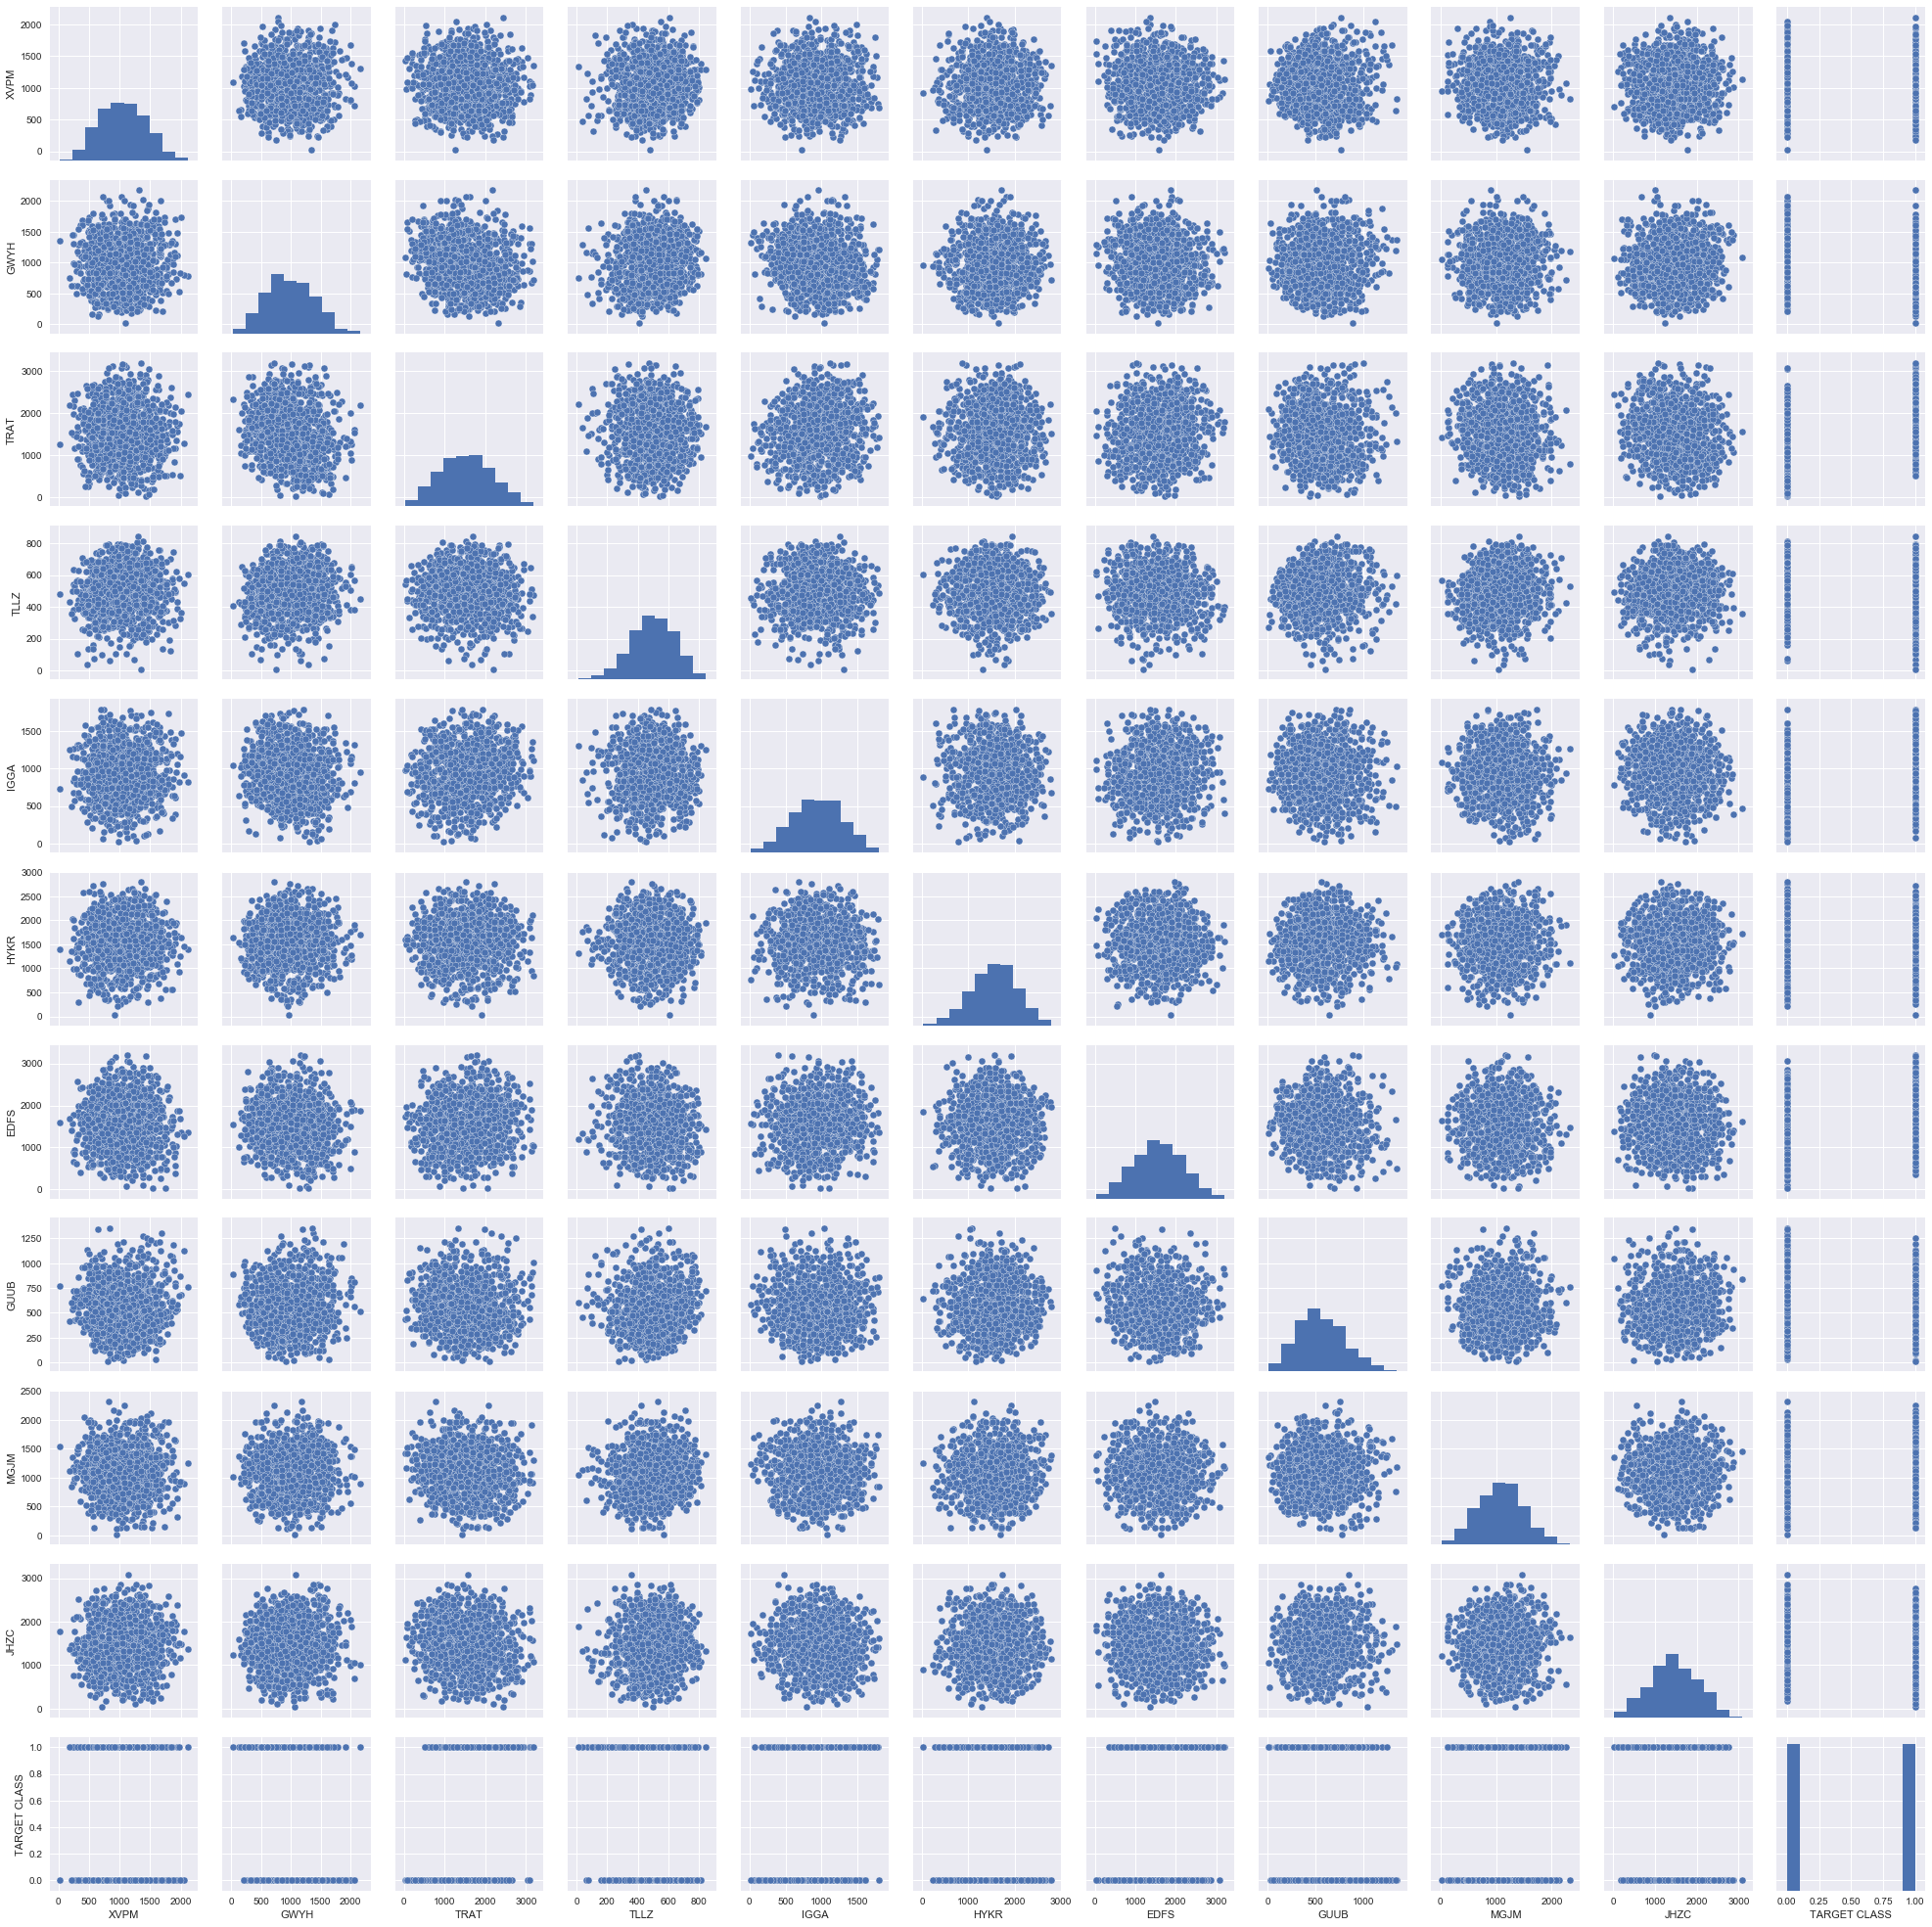

In [7]:
sns.pairplot(data)

# Standardize the Variables

Time to standardize the variables since KNN use distance metrics for calculation.

** Import StandardScaler from Scikit learn.**

In [10]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [11]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [19]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [21]:
scal_feat = scaler.fit_transform(data.drop('TARGET CLASS', axis=1))
scal_feat

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ..., 
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [23]:
data_feat = pd.DataFrame(scal_feat,columns = data.columns[:-1])
data_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
5,1.437244,-0.827457,0.847975,-0.914267,-0.102903,1.375667,-1.137473,0.029738,-1.101580,1.240523
6,1.192634,-0.432092,-0.970855,1.238040,0.982445,0.728702,-0.849378,0.616467,-0.956891,-0.641066
7,0.317560,0.446607,-1.677772,-0.347079,0.489673,-1.024006,-0.433190,-1.198889,-0.357902,1.506390
8,-0.581391,0.249681,-1.368313,1.150715,1.703935,-0.059437,-0.266295,-0.519027,0.496928,0.418472
9,-0.071150,-2.014273,-0.778997,-0.462438,0.007273,0.867458,-1.517317,0.777843,0.614484,-0.695004


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
X = np.array(data_feat)
y = data['TARGET CLASS']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [37]:
KNN = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [38]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [40]:
pred = KNN.predict(X_test)

** Create a confusion matrix and classification report.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test,pred))

[[117  33]
 [ 39 111]]
             precision    recall  f1-score   support

          0       0.75      0.78      0.76       150
          1       0.77      0.74      0.76       150

avg / total       0.76      0.76      0.76       300



In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.75      0.78      0.76       150
          1       0.77      0.74      0.76       150

avg / total       0.76      0.76      0.76       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [68]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

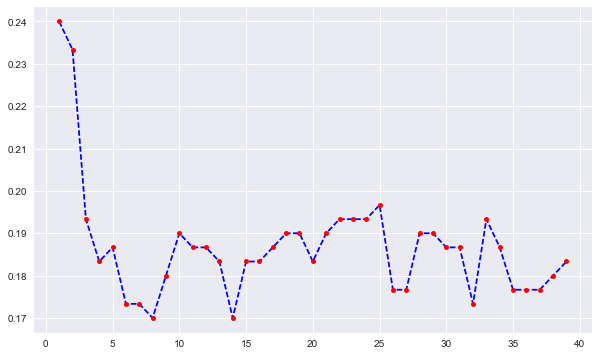

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--', marker='o',markerfacecolor='red',ms=5)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [76]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[119  31]
 [ 24 126]]


             precision    recall  f1-score   support

          0       0.83      0.79      0.81       150
          1       0.80      0.84      0.82       150

avg / total       0.82      0.82      0.82       300

